In [86]:
import pandas as pd
import numpy as np


num_cities = 100000

np.random.seed(107)

cities = []
for i in range(num_cities):
    city = {
        'Population': np.random.randint(1000, 1000000),
        'Latitude': np.random.uniform(0, 40),
        'Longitude': np.random.uniform(0, 60),
        'Area': np.random.randint(50, 1000),
        'GDP': np.random.uniform(0, 100),
        'High education': np.random.uniform(0, 0.4),
        'Ad budget': np.random.uniform(0, 1000000)
    }
    
    
    # city['Income'] = (
        # city['GDP'] * city['Population'] * 0.001 +
        # city['High education'] * 50000 +
        # city['Ad budget'] * 0.0001 +
        # city['Area'] * 10 +
        # (40 - city['Latitude']) * 1000 +
        # (60 - city['Longitude']) * 1000
    # )
    city['Income'] = (
        city['Population'] * city['Ad budget'] * 0.00001
    )

    cities.append(city)


df = pd.DataFrame(cities)
df.head()


,Population,Latitude,Longitude,Area,GDP,High education,Ad budget,Income
0,461862,39.642326,32.172610,381,22.526441,0.136505,152491.226921,7.042990e+05
1,948090,27.759139,21.799416,603,59.977281,0.388389,702063.933425,6.656198e+06
2,956048,28.593951,7.735642,513,20.939241,0.315871,818388.601632,7.824188e+06
3,780270,29.406730,2.384702,674,54.931801,0.032674,460493.313714,3.593091e+06
4,19953,17.394419,17.878825,647,25.797180,0.398341,384495.324809,7.671835e+04


In [87]:
df.describe()


,Population,Latitude,Longitude,Area,GDP,High education,Ad budget,Income
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,503176.721100,20.014963,29.924199,525.262200,49.677894,0.199060,506050.956145,2.540847e+06
std,291266.452066,11.552527,17.253630,274.610686,28.878231,0.115208,288691.670172,2.226939e+06
min,1036.000000,0.005099,0.002710,50.000000,0.029583,0.000065,80.059404,4.913632e+01
25%,248381.750000,10.080849,14.868646,287.000000,24.502526,0.099607,256391.982050,6.920629e+05
50%,503306.500000,19.850655,29.979216,524.000000,49.348383,0.200711,504626.151151,1.919210e+06
75%,757018.500000,29.989097,44.763026,766.000000,74.795058,0.297135,761654.759994,3.875918e+06
max,999996.000000,39.999235,59.995327,999.000000,99.967451,0.399997,999938.100334,9.758465e+06


In [84]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = df[['Population', 'Latitude', 'Longitude', 'Area', 'GDP', 'High education', 'Ad budget']].values
y = df['Income'].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [92]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),  
    Dense(16, activation='relu'),  
    Dense(1)  
])


model.compile(optimizer='adam', loss='mean_squared_error')


history = model.fit(X_train, y_train, epochs=70, batch_size=32, validation_split=0.2)


Epoch 1/70


c:\Users\patry\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 11497522593792.0000 - val_loss: 11372728418304.0000
Epoch 2/70
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - loss: 11430607716352.0000 - val_loss: 11272922857472.0000
Epoch 3/70
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - loss: 11085223559168.0000 - val_loss: 10800958799872.0000
Epoch 4/70
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - loss: 10580689682432.0000 - val_loss: 9659279736832.0000
Epoch 5/70
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - loss: 9354558308352.0000 - val_loss: 7841130741760.0000
Epoch 6/70
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - loss: 7387430256640.0000 - val_loss: 5896780906496.0000
Epoch 7/70
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - loss: 5759660720128.0000 - val_loss: 4630522101760.0000
Epoch 8/70
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - loss: 4461164494848.0000 - val_loss: 4159028854784.0000
Epoch 9/70
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - loss: 4248902565888.0000 - val_loss: 4041935421440.000

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - loss: 299852103680.0000


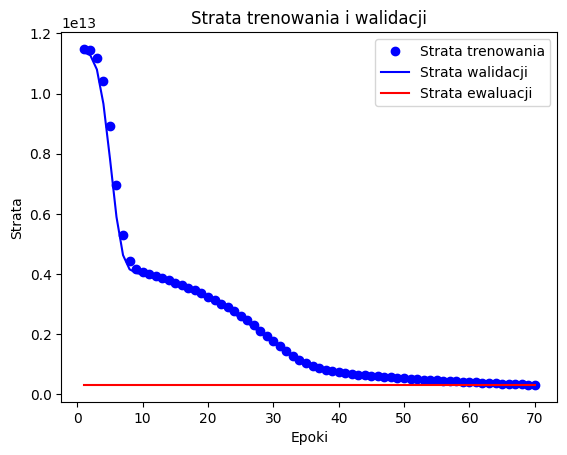

In [93]:
evaluated = model.evaluate(X_test, y_test)

history_dict = history.history


import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Strata trenowania')
plt.plot(epochs, val_loss, 'b', label='Strata walidacji')

# plot evaluation
# evaluated = model.evaluate(X_test, y_test)
plt.plot(epochs, [evaluated] * len(epochs), 'r', label='Strata ewaluacji')

plt.title('Strata trenowania i walidacji')
plt.xlabel('Epoki')
plt.ylabel('Strata')
plt.legend()
plt.show()


In [96]:
model.predict(X_test[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


array([[  877988.24289967,  1928455.13680878, -4350230.0179436 ,
          994656.19097508,  1044964.02897496,  1914897.77556494,
         -823438.78107077, -3616508.29048984,  1669534.52608291,
        -1766244.51045085],
       [ -976393.92897533,    74072.96493378, -6204612.1898186 ,
         -859725.98089992,  -809418.14290004,    60515.60368994,
        -2677820.95294577, -5470890.46236484,  -184847.64579209,
        -3620626.68232585],
       [ 4986889.49289967,  6037356.38680878,  -241328.7679436 ,
         5103557.44097508,  5153865.27897496,  6023799.02556495,
         3285462.46892923,   492392.95951016,  5778435.77608291,
         2342656.73954915],
       [ 1187190.24289967,  2237657.13680878, -4041028.0179436 ,
         1303858.19097508,  1354166.02897496,  2224099.77556494,
         -514236.78107077, -3307306.29048984,  1978736.52608291,
        -1457042.51045085],
       [  749207.49289967,  1799674.38680878, -4479010.7679436 ,
          865875.44097508,   916183.2789749

In [95]:
y_test[:10]

array([1.05160151e+06, 1.13461319e+03, 6.27981977e+06, 9.34933559e+05,
       8.84625721e+05, 1.46919744e+04, 2.75302853e+06, 5.54609804e+06,
       2.60055224e+05, 3.69583426e+06])